In [1]:
import warnings
warnings.simplefilter('ignore')

# 0. Install and Import Dependencies

In [8]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 410.6 kB/s eta 0:00:0000:0100:01


In [6]:
!pip install pystan
!pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 426.0 kB/s eta 0:00:0000:0100:01
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 KB 6.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 620.5 kB/s eta 0:00:00 0:00:01
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [9]:
import pandas as pd
from prophet import Prophet

# 1. Read in Data and Process Dates

In [10]:
df = pd.read_excel('same-beef.xlsx')

In [12]:
df.columns = ['ds', 'y']

In [13]:
df.head()

,ds,y
0,2022-08-05 23:26:28,442654283
1,2022-08-06 23:35:27,442993366
2,2022-08-07 23:33:43,443359135
3,2022-08-08 23:02:40,443655295
4,2022-08-09 23:08:07,443965563


# 2. Train Model

In [14]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

01:58:37 - cmdstanpy - INFO - Chain [1] start processing
01:58:38 - cmdstanpy - INFO - Chain [1] done processing


# 3. Forecast Away

In [15]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-08-05 23:26:28,1.429444e+08,4.426338e+08,4.426717e+08,1.429444e+08,1.429444e+08,2.997086e+08,2.997086e+08,2.997086e+08,2.997207e+08,2.997207e+08,2.997207e+08,-12134.584361,-12134.584361,-12134.584361,0.0,0.0,0.0,4.426530e+08
1,2022-08-06 23:35:27,1.432720e+08,4.429803e+08,4.430171e+08,1.432720e+08,1.432720e+08,2.997254e+08,2.997254e+08,2.997254e+08,2.997285e+08,2.997285e+08,2.997285e+08,-3120.942271,-3120.942271,-3120.942271,0.0,0.0,0.0,4.429974e+08
2,2022-08-07 23:33:43,1.435971e+08,4.433356e+08,4.433746e+08,1.435971e+08,1.435971e+08,2.997577e+08,2.997577e+08,2.997577e+08,2.997261e+08,2.997261e+08,2.997261e+08,31593.901823,31593.901823,31593.901823,0.0,0.0,0.0,4.433547e+08
3,2022-08-08 23:02:40,1.439108e+08,4.436421e+08,4.436812e+08,1.439108e+08,1.439108e+08,2.997500e+08,2.997500e+08,2.997500e+08,2.997397e+08,2.997397e+08,2.997397e+08,10371.842572,10371.842572,10371.842572,0.0,0.0,0.0,4.436609e+08
4,2022-08-09 23:08:07,1.442327e+08,4.439409e+08,4.439789e+08,1.442327e+08,1.442327e+08,2.997279e+08,2.997279e+08,2.997279e+08,2.997335e+08,2.997335e+08,2.997335e+08,-5564.983076,-5564.983076,-5564.983076,0.0,0.0,0.0,4.439606e+08


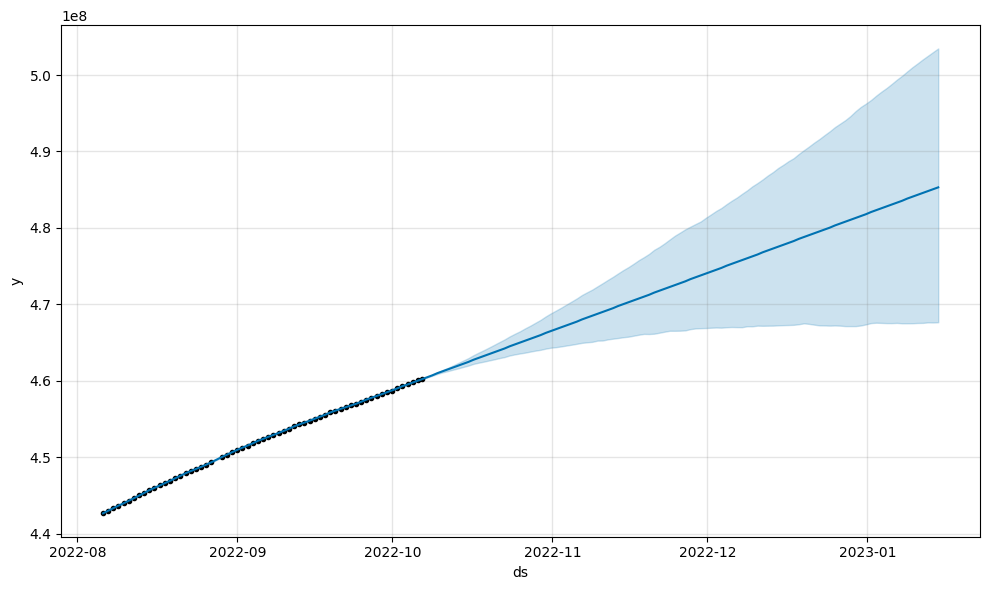

In [16]:
plot1 = m.plot(forecast)

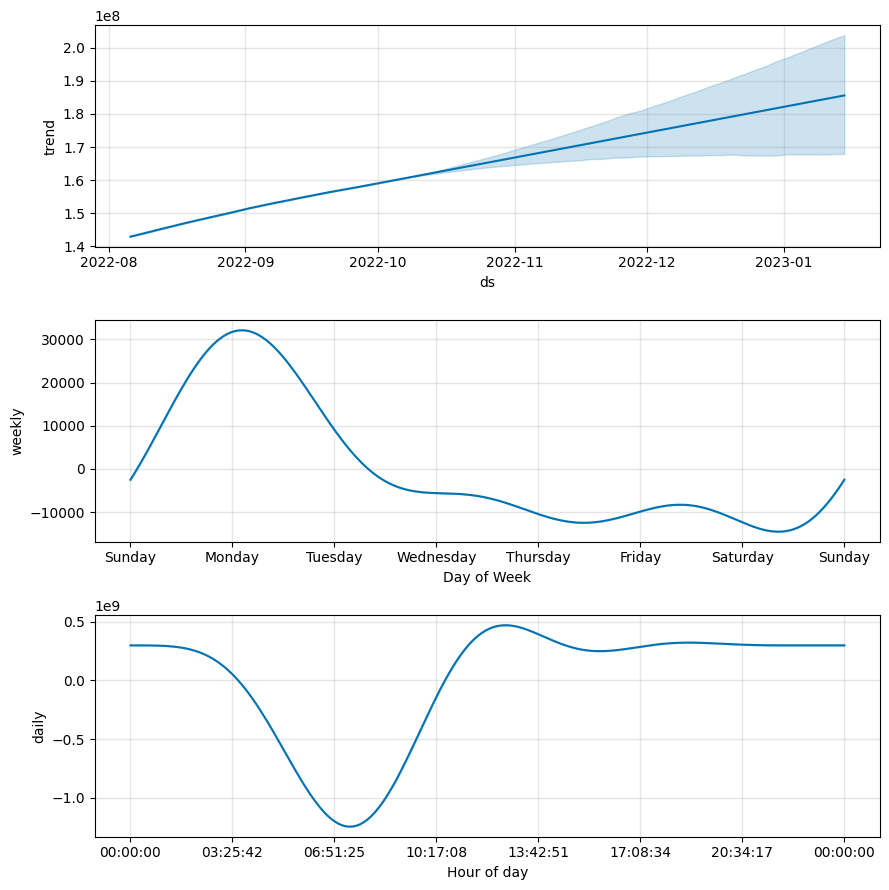

In [17]:
plt2 = m.plot_components(forecast)